## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

var_list = ['year','id','wrkstat','prestige','occ','educ','sex','race','rincome','polviews']

# List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    df = pd.read_parquet(url) # Download this chunk of data
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

gss = pd.read_csv("selected_gss_data.csv")

# Display 1st 5 rows
print(gss.head())


   year  id            wrkstat  prestige    occ  educ     sex   race rincome  \
0  1972   1  working full time      50.0  205.0  16.0  female  white     NaN   
1  1972   2            retired      45.0  441.0  10.0    male  white     NaN   
2  1972   3  working part time      44.0  270.0  12.0  female  white     NaN   
3  1972   4  working full time      57.0    1.0  17.0  female  white     NaN   
4  1972   5      keeping house      40.0  385.0  12.0  female  white     NaN   

  polviews  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


We chose 10 variables to feature in our dataset: year, id, wrkstat, prestige, occ, educ, sex, race, rincome, and polviews. We chose the year variable as it tracks trends over time and is useful to analyze how opinions/demographics have changed over time. We chose the ID variable as it is a unique identifier for respondents and can allow us to clean/merge the data while maintaining individual data indexes. We chose wrkstat as it shows if someone's employment level and could have a relationship with income, education, prestige, etc. We chose prestige as it measures the social standing of jobs, it can be useful for connecting occupation, education, and other factors to social class. We chose occ to get specific occupation information, we can get specifics about industires and job types. We chose educ to see the years of education individuals have, this is a key socioeconomic variable. We chose sex to analyze the differences in our data across genders. We chose race to analyze inequality and see if there are relationships between our data and race. We chose rincome as it is a direct measure of financial ability and likely has relationships with occupation, education, and more. Finally, our last variable is polviews to analyze how political views align with certain demographics and social positions.

There are interesting relationships we can explore with these variables such as education v. income, does more schooling translate to higher income? Work status v. gender, are men and women equally represented in full-time work? Presitge v. politics, are higher-prestige jobs associated with a particular political group? Race v. education, are there gaps in average education by race and how have they changed over time? Income v. political views, is there a relationship between political views and high earners?

Education in Years:
count    72127.000000
mean        13.034633
std          3.182372
min          0.000000
25%         12.000000
50%         12.000000
75%         16.000000
max         20.000000
Name: educ, dtype: float64 

Prestige Score:
count    24267.000000
mean        39.356451
std         14.037120
min         12.000000
25%         30.000000
50%         39.000000
75%         48.000000
max         82.000000
Name: prestige, dtype: float64 

Political Views (1 = fully liberal, 7 = fully conservative):
count                            62718
unique                               7
top       moderate, middle of the road
freq                             23992
Name: polviews, dtype: object 

Sex Count:
sex
female    40301
male      31977
NaN         112
Name: count, dtype: int64 

Race Count:
race
white    57657
black    10215
other     4411
NaN        107
Name: count, dtype: int64 

Work Status Count:
wrkstat
working full time                                                             

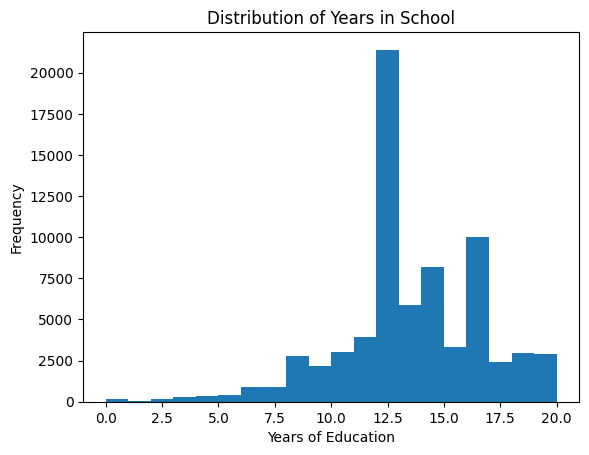

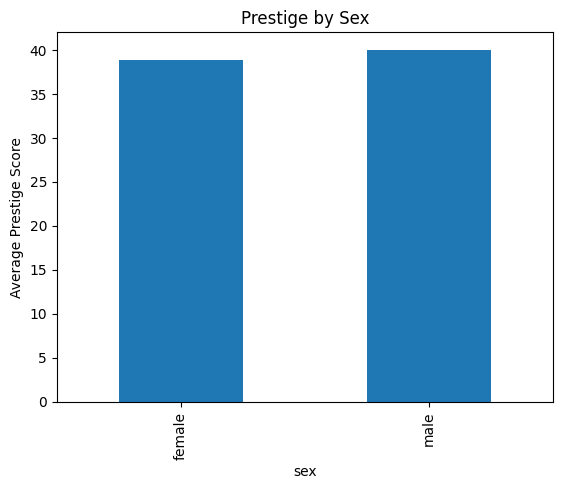

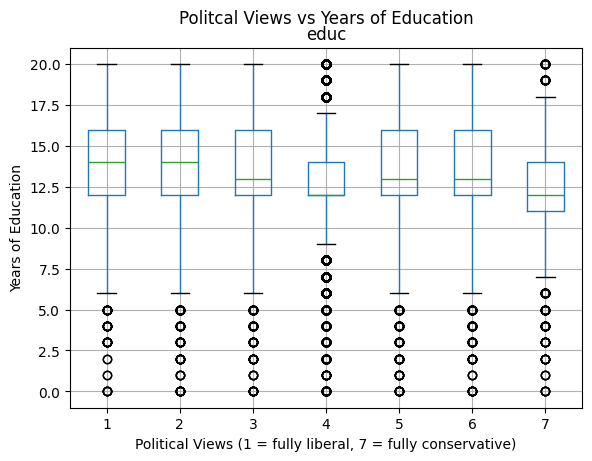

In [ ]:
gss
## clean data for EDA
# One of the more important things to do is to make the data more understandable by
# better organizing some of the variables into the correct order, like political views
# going from liberal to conservative.
# I will also convert everything to lowercase to ensure consistency
gss.columns = gss.columns.str.lower()
pol_order = [
    "extremely liberal", "liberal", "slightly liberal",
    "moderate, middle of the road",
    "slightly conservative", "conservative", "extremely conservative"
]
gss["polviews"] = pd.Categorical(gss["polviews"], categories=pol_order, ordered=True)

# here I am getting rid of any rows that are missing any of the major variables to ensure complete data.
gss_clean = gss.dropna(subset=["educ", "prestige", "sex", "race", "rincome", "polviews"])

# The data in general is already quite clean, so the work we must do is minimal. Instead, focusing
# on visualizing and drawing conclusions from the data is the more important aspect.

## numeric summaries and visualizations

print("Education in Years:")
print(gss["educ"].describe(), "\n")

print("Prestige Score:")
print(gss["prestige"].describe(), "\n")

print("Political Views (1 = fully liberal, 7 = fully conservative):")
print(gss["polviews"].describe(), "\n")

print("Sex Count:")
print(gss["sex"].value_counts(dropna=False), "\n")

print("Race Count:")
print(gss["race"].value_counts(dropna=False), "\n")

print("Work Status Count:")
print(gss["wrkstat"].value_counts(dropna=False).head(10), "\n")

print("Income Catagories:")
print(gss["rincome"].value_counts().head(10), "\n")

#Histogram describing the distrobution of how many years people are in school
gss["educ"].dropna().plot.hist(bins=20)
plt.xlabel("Years of Education")
plt.title("Distribution of Years in School")
plt.show()

#Bar chart that shows the average prestiege score of a job based on employee sex
gss.groupby("sex")["prestige"].mean().plot.bar()
plt.ylabel("Average Prestige Score")
plt.title("Prestige by Sex")
plt.show()

#Boxplot comparing years of education to political views, which often comes up in media conversations today
gss.boxplot(column="educ", by="polviews")
plt.xlabel("Political Views (1 = fully liberal, 7 = fully conservative)")
plt.ylabel("Years of Education")
plt.suptitle("Politcal Views vs Years of Education")
plt.xticks(ticks=range(1,8), labels=[1,2,3,4,5,6,7]) # turn labels into numeric so they fit in the plot
plt.show()

## describe findings


**Findings Description**

We can make key conclusions and findings from our numeric summarys and visulizations.

Staring with numeric summarys, education in years has a large N of (72127) with a mean of 13.03 and a median of 12.00. Therefore, the typical respondant completed high school and many have some college experience. The IQR is between 12 and 16 with a maximum of 20 conveying a strong college/grad-school tail. This conveys that credentials and schooling matter and that policies around college affordability and pathways are crucial to increase this median number.

The prestige summary has a mean of 39.36 and median of 39.00. There is a smaller count number as prestige only applies to people with occupations. The IQR is between 30-48 on a 12-82 scale showing a large amount of diversity in the data. There is a standard deviation of 14.04, this wide spread reflects strong occupational stratification. Prestige correlates with pay and  networks, thus these findings are significant to our analysis.


Analyzing the political views, we see that on a 7-point scale, the modal category (category with the higest frequency) is "moderate/middle of the road". We can conclude that ideology clusters around the middle. This suggests a "moderate" public where coalition policies are possible and potentially mutually agreed upon.  Numbers conveying polarization are shielded by the high frequency middle, though it may exist.


When we look at the sex count, we see there are slighlty more female than male respondents in the sampe (40k comapred to 32k). A slight female majority aligns with population structure. When combined with work/education differences, it highlights the need for family policy, childcare access, pay equality, and more.

Looking at the race numeric summary table we can see that the majority of respondents are white, black respondants are next, then "other" races. We can use this breakdown to draw on key relationships between race and key societal variables.

The work status count summary shows that working full time is the largest group (~35k). The next most frequent classifications are "retired" and "keeping house". The large retired and keeping house groups reflect the life-course stages and transition of boomers into retirement. It suggests a need to focus on elderlycare, retirement preparation, and systems to help seamlessly transition.

The income categories convey that the top category ("25,000 or more") is the most frequent. This metric doesn't capture key data as income is concentrated in the top bin and true inequality is understated. We'd argue that a different choice of income bins would be beneficial for further analysis and drawing meaningful conclusions.

Looking at the histogram that shows the distribution of respondent's years in school, we see clear peaks at 12 and 16 which are associated with highschool and college. We see a thinner tail at 18-20 that represents graduate work. To increase the average towards 16 or a college-education we cna push for dual-enrollment programs, transfer pipelines, and increased high school resources.

The bar chart that shows the average prestige score by sex suggests that men have a slightly higher mean prestige (40 vs. 39). This is a very small gap but could be significant when applied to populations of men and women. Pay transparency, promotion encouragement, and childcare resources could help bridge this gap.

The boxplot that compares political views with education years shows a slight negative association between converatism and years of school. Dispersion is similar across groups, there many outliers in the lower-education range. This conclusion could be confounded by age, region, etc. but it suggests that education policy can influence political culture.

Overall, we were able to draw interesting relationships from our analysis and identify key trends and conclusions.